# 지표로 데이터 탐색하기
EDA! EDA!    
변수를 기준으로 1개의 변수만 분석하는 **일변량 분석**  
2개 이상의 변수 간의 관계를 분석하는 **다변량 분석**

In [3]:
import pandas as pd
df = pd.read_csv('./flight_price_prediction/Clean_Dataset.csv', encoding='cp949')
df.drop([df.columns[0]], axis=1, inplace=True)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [5]:
df.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [10]:
print(df['airline'].value_counts())
print('-'*30)
print(df['source_city'].value_counts())
print('-'*30)
print(df['destination_city'].value_counts())

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
------------------------------
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
------------------------------
destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64


Correlation은 수치형 데이터의 상관관계를 이해하는 데 사용된다.

In [16]:
df[['duration','days_left','price']].corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [20]:
df_eco = df[df['class']=='Economy']
df_eco[['duration','days_left','price']].corr()

,duration,days_left,price
duration,1.000000,-0.042537,0.288379
days_left,-0.042537,1.000000,-0.559551
price,0.288379,-0.559551,1.000000


교차표는 범주형 데이터의 상관관계를 확인하는 데 사용된다.

In [21]:
pd.crosstab(df['source_city'], df['departure_time'])

departure_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
source_city,,,,,,
Bangalore,5183,13611,14243,457,12323,6244
Chennai,5807,9319,5402,72,10550,7550
Delhi,11234,12248,16790,357,13679,7035
Hyderabad,7221,8524,5991,38,9923,9109
Kolkata,7863,8133,9594,114,12065,8578
Mumbai,10486,14955,13082,268,12606,9499


## 시각화로 데이터 탐색하기
matplotlib를 사용할 때는, 3가지를 기억하자.  
figure, plot, show  

선 그래프  
시간이나 순서에 따른 데이터의 **연속적인 변화량**을 관찰할 때 사용됨  
데이터의 **증가 혹은 감소**를 파악하기 용이하다.

In [47]:
# days_left = df.groupby('days_left').mean()
# days_left.head()
# pd.DataFrame.groupby?
days_left = df.groupby('days_left').mean(numeric_only=True)
days_left.head()

,duration,price
days_left,,
1,14.250228,21591.867151
2,14.111080,30211.299801
3,14.287476,28976.083569
4,13.742667,25730.905653
5,12.921970,26679.773368


            duration         price
days_left                         
1          14.250228  21591.867151
2          14.111080  30211.299801
3          14.287476  28976.083569
4          13.742667  25730.905653
5          12.921970  26679.773368


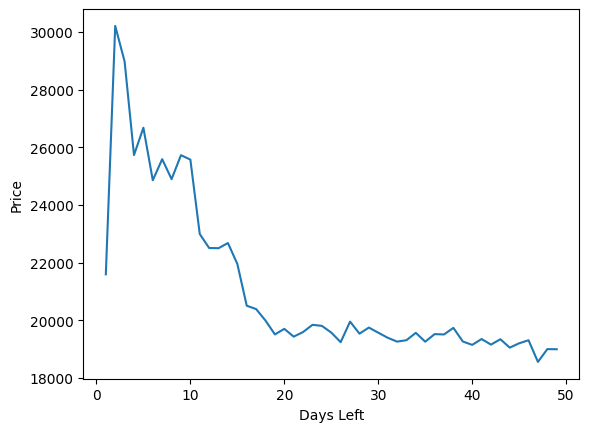

In [73]:
import matplotlib.pyplot as plt
print(days_left.head())
plt.figure()
plt.plot(days_left['price'])
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()

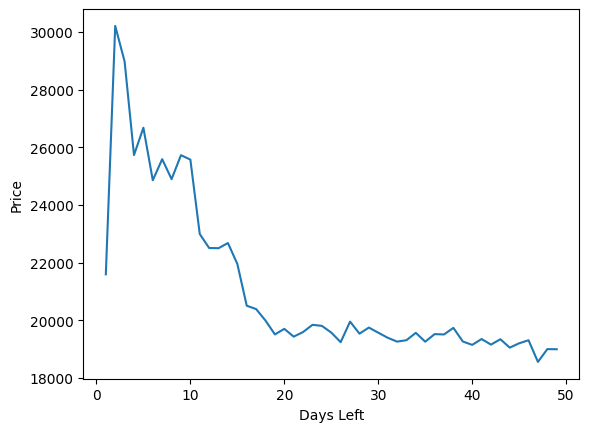

In [79]:
import seaborn as sns
plt.xlabel('Days Left')
plt.ylabel('Price')
sns.lineplot(days_left, x='days_left', y='price')
plt.show()


막대 그래프  
각 항목의 **수량을 한눈에 파악**하기 용이함  
**크고 작음을 비교**


In [44]:
airline = df.groupby(['airline']).mean(numeric_only=True)
airline

,duration,days_left,price
airline,,,
AirAsia,8.941714,27.735184,4091.072742
Air_India,15.504235,25.497466,23507.019112
GO_FIRST,8.755380,27.430415,5652.007595
Indigo,5.795197,26.264309,5324.216303
SpiceJet,12.579767,24.122850,6179.278881
Vistara,13.326634,25.894532,30396.536302


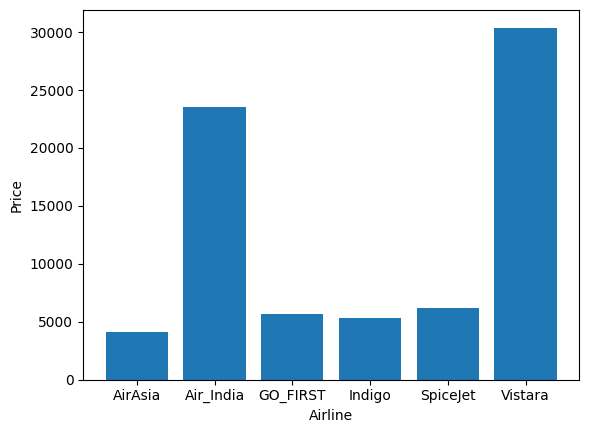

In [46]:
label = airline.index
plt.figure()
plt.bar(label, airline['price'])
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

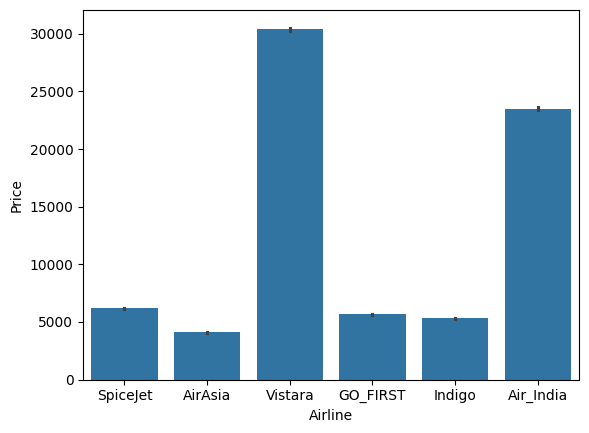

In [82]:
plt.xlabel('Airline')
plt.ylabel('Price')
sns.barplot(df, x='airline',y='price')
plt.show()

파이 그래프  
전체에 대한 각 **부분의 비율**을 나타낸 그래프  
점유율, 투표율, 구성 비율 등을 쉽게 확인할 수 있다.

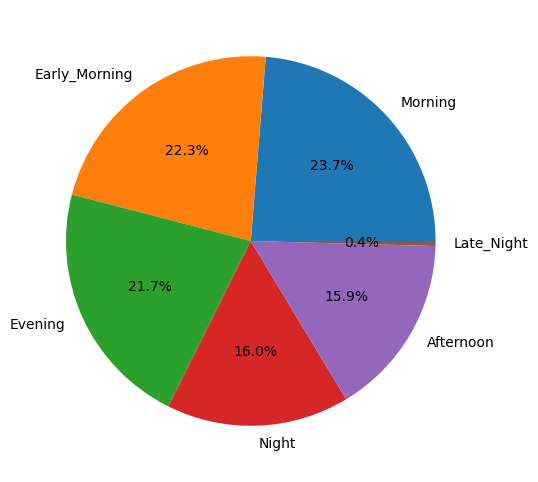

In [50]:
departure_time = df['departure_time'].value_counts()
departure_time
plt.figure(figsize=(10, 6))

plt.pie(departure_time, labels = departure_time.index, autopct='%.1f%%')
plt.show()

In [ ]:
# seaborn에는 pie chart 없음!

## 히스토그램
특정 데이터의 **빈도수**를 막대 모양으로 표시한 그래프  
가장 많이 사용되는 **통계, 분석 도구**  
가로축에는 **계급**을, 세로축에는 **도수**를 지정.  
**계급**은 보통 변수의 구간을 사용. **인접하되 겹치면 안됨**  

Q: 목적지 까지 소요 시간의 분포를 알아보자

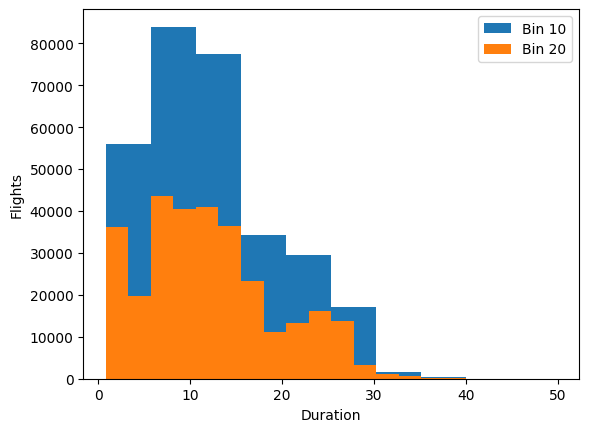

In [53]:
# duration을 체크해야 한다.
plt.figure()
plt.hist(df['duration'], bins=10)
plt.hist(df['duration'], bins=20)
plt.xlabel("Duration")
plt.ylabel("Flights")

plt.legend(("Bin 10", "Bin 20"))
plt.show()

In [83]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


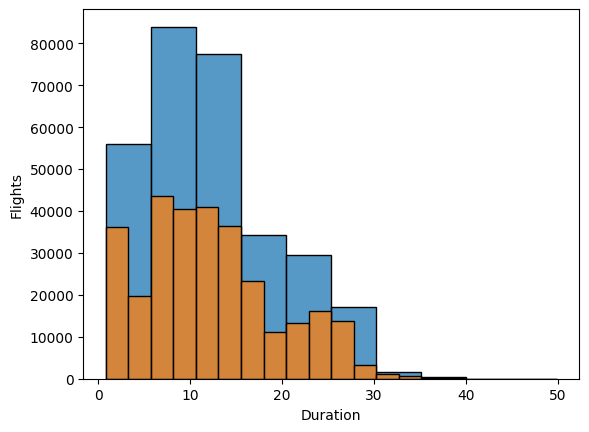

In [92]:
plt.xlabel("Duration")
plt.ylabel("Flights")
sns.histplot(df, x='duration', bins=10)
sns.histplot(df, x='duration', bins=20)
# sns.histplot(df, x='duration', y='flight', bins=20)
plt.show()


## 박스 플롯
사분위수를 중심으로 **수치적 요약 통계 자료를 시각화**하는 그래프  

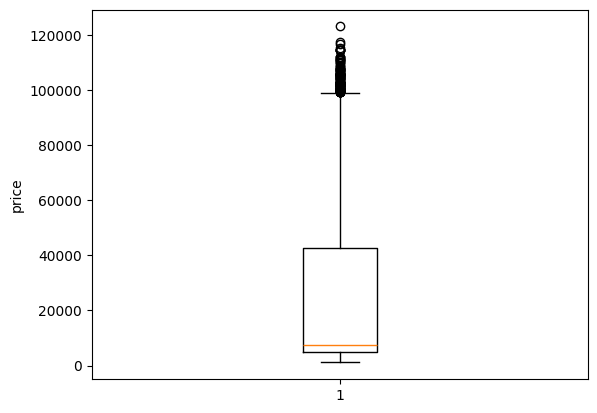

In [57]:
plt.figure()
plt.boxplot(list(df['price']))
plt.ylabel('price')
plt.show()

<Axes: xlabel='departure_time', ylabel='price'>

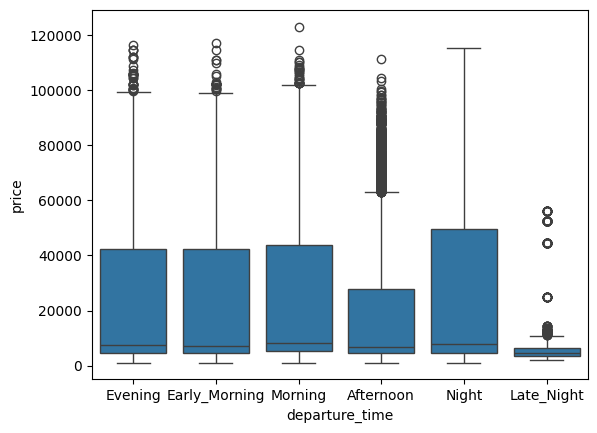

In [93]:
sns.boxplot(df, x='departure_time', y='price')

Q: 출발 시간 별 가격 정보의 분포 확인하기

<Axes: title={'center': 'price'}, xlabel='departure_time'>

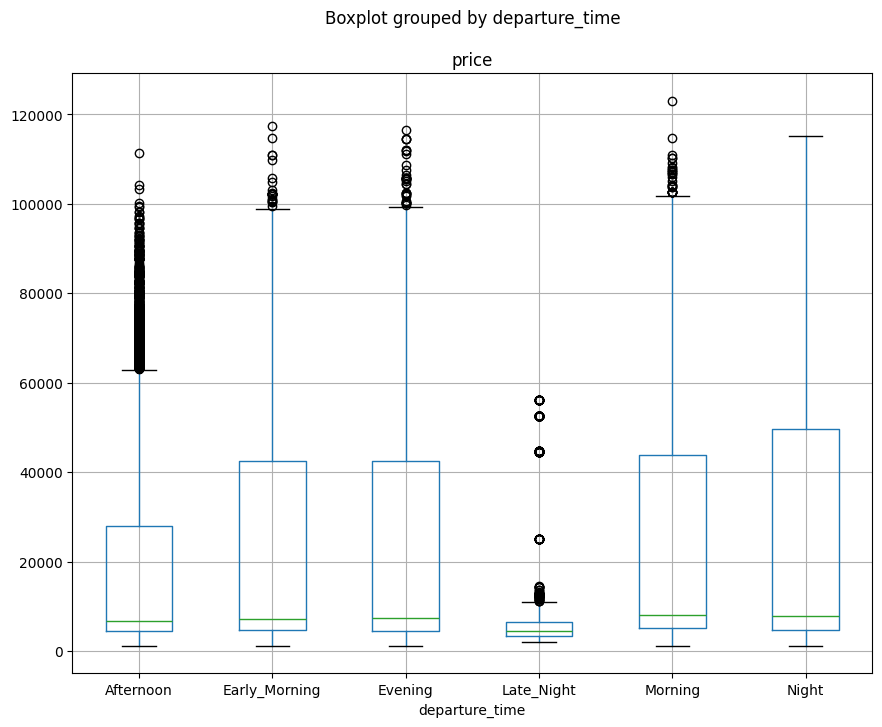

In [61]:
df.boxplot(by='departure_time', column='price', figsize=(10,8))

# 다변량 시각화 탐색하기
## 산점도
2개의 연속형 변수의 관계를 보기 위해 **X축과 Y축에 표시하는 점을 찍어서 만드는 그래프**  
Q: 비행 시간과 항공권 가격의 관계를 알아보기

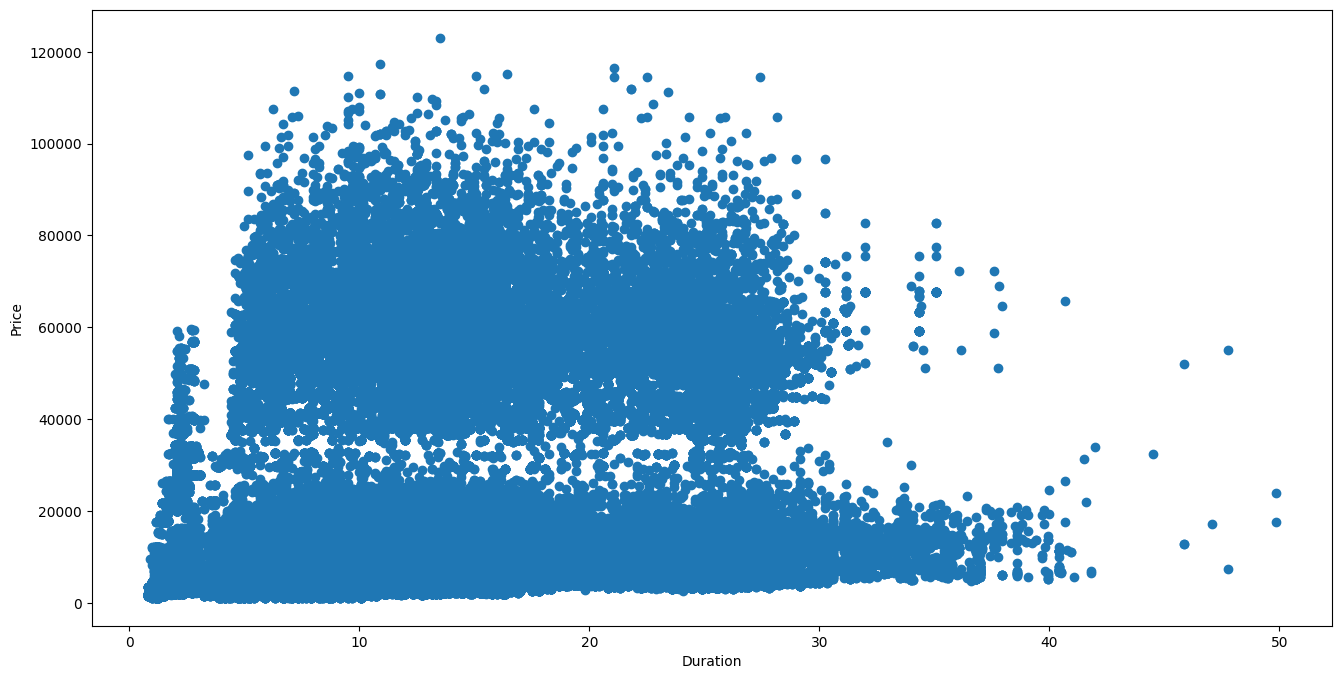

In [65]:
plt.figure(figsize=(16,8))
plt.scatter(x=df['duration'], y=df['price'])
plt.xlabel('Duration')
plt.ylabel("Price")
plt.show()

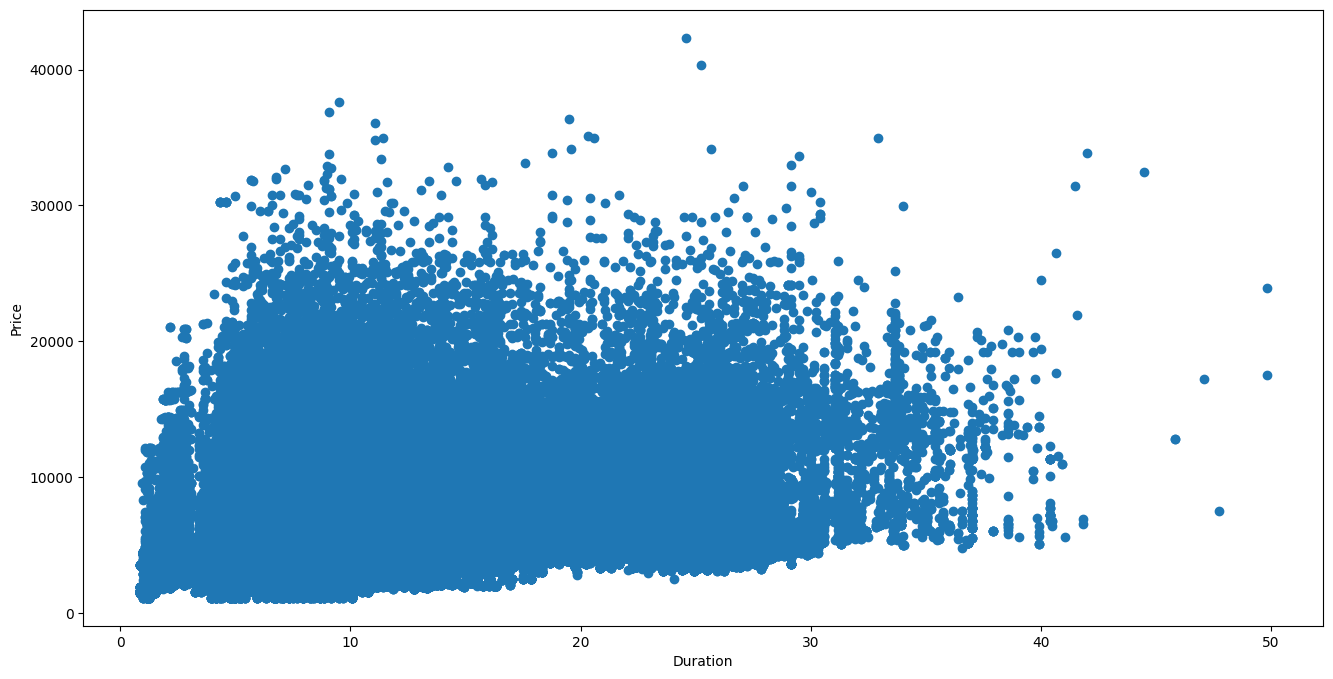

In [66]:
plt.figure(figsize=(16,8))
plt.scatter(x=df_eco['duration'], y=df_eco['price'])
plt.xlabel('Duration')
plt.ylabel("Price")
plt.show()

## 히트맵
데이터의 배열을 **색상으로 표현해주는 그래프**  
두 값 또는 각 칼럼 간의 상관관계를 나타낼 때 주로 사용함.

<Axes: >

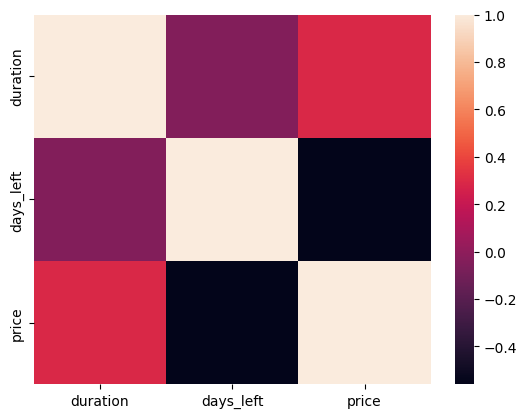

In [72]:
import seaborn as sns

heat = df_eco.corr(numeric_only=True)
sns.heatmap(heat)

### matplotlib과 연관된 함수
figure()  
grid(Boolean)  
show()  
title(str)  
xlabel(str)  
xlim([하한, 상한])  
xticks
ylabel(str)  
ylim([하한, 상한])  
yticks

## seaborn 시각화 라이브러리 활용하기